<a href="https://colab.research.google.com/github/SergioaA64/TCC/blob/main/AldirBlanc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auxílio Emergencial da Cultura - Trabalho 

Nome: Sergio Affonso de Oliveira

Orientador: Prof. Dr. Hélio Bomfim de Macedo Filho

### Tema : Auxílio Emergencial da Cultura - Lei Aldir Blanc

O Auxílio emergencial da Cultura foi criado em junho de 2020 com o objetivo de auxiliar e apoiar profissionais do setor, estabelecimentos e iniciativas culturais durante a pandemia. O trabalho terá como ênfase as iniciativas culturais contempladas com o benefício.

Esse auxílio emergencial, de acordo com a Lei 14.017 de 29 de junho de 2020, pode ser executado de três formas seguintes:

I - renda emergencial mensal aos trabalhadores e trabalhadoras da cultura;

II - subsídio mensal para manutenção de espaços artísticos e culturais, instituições e organizações culturais comunitárias que tiveram as suas atividades interrompidas por força das medidas de isolamento social; e

III - editais, chamadas públicas, prêmios, aquisição de bens e serviços vinculados ao setor cultural e outros instrumentos destinados à manutenção de agentes, de espaços, de iniciativas, de cursos, de produções, de desenvolvimento de atividades de economia criativa e de economia solidária, de produções audiovisuais, de manifestações culturais, bem como à realização de atividades artísticas e culturais que possam ser transmitidas pela internet ou disponibilizadas por meio de redes sociais e outras plataformas digitais.

Os recursos são executados de forma descentralizada, mediante transferências da União aos Estados, aos Municípios e ao Distrito Federal.

A participação dos Estados e municípios é eletiva: o Ente Federado deve se cadastrar e apresentar um plano de ação.

Fonte de dados: http://portalsnc.cultura.gov.br/indicadorescultura/ e
https://www.ibge.gov.br/

Foram também utilizados dados o painel Aldir Blanc (interno da CGU, com os dados descaracterizados).

Este trabalho restringiu-se a apresentar aspectos gerais da política em execução, de forma a aplicar as técnicas de estatísticas transmitidas, e apresentar uma primeira análise desses dados, como:

Valor transferido ao município por habitante;

Panorama dos municípios cadastrados e não cadastrados;

Correlação entre o IDHM e a participação no Programa do Auxílio Emergencial; e

Teste de hipótese: se existe dependência entre a participação no Programa e o IDHM.





Importar e inicializar as bibliotecas a serem utilizadas

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

Importação de dados com a população e IDHM de todos os municípios. Fonte IBGE Informação da situação do Município em Relação à Lei Aldir Blanc

In [ ]:
ibge = pd.read_csv("https://raw.githubusercontent.com/SergioaA64/TCC/main/DADOS_IBGE.csv", encoding = "iso8859_16", sep =";", decimal=",")

# ibge.head()
ibge

,COD_IBGE,COD_SIAFI,NOME_ENTE,NOME_SIMPLIFICADO,SIGLA_UF,NOME_UF,POP_EST_2020,CAPITAL,REGIAO,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,SITUACAO,CLASSE_IDHM,IDHM_QUARTIL
0,1504505,489.0,Melgaço,MELGACO,PA,Pará,27890,0,N,0.418,0.776,0.207,0.454,Aprovado,D,D
1,2104081,158.0,Fernando Falcăo,FERNANDO FALCAO,MA,Maranhăo,10460,0,NE,0.443,0.728,0.286,0.417,Aprovado,D,D
2,1300201,205.0,Atalaia do Norte,ATALAIA DO NORTE,AM,Amazonas,20398,0,N,0.450,0.733,0.259,0.481,Em Complementaçăo,D,D
3,2106359,192.0,Marajá do Sena,MARAJA DO SENA,MA,Maranhăo,7775,0,NE,0.452,0.774,0.299,0.400,Aprovado,D,D
4,1502509,449.0,Chaves,CHAVES,PA,Pará,23948,0,N,0.453,0.769,0.234,0.516,Aprovado,D,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,4202008,8039.0,Balneário Camboriú,BALNEARIO CAMBORIU,SC,Santa Catarina,145796,0,S,0.845,0.894,0.789,0.854,Aprovado,A,A
5561,3205309,5705.0,Vitória,VITORIA,ES,Espírito Santo,365855,1,SE,0.845,0.855,0.805,0.876,Aprovado,A,A
5562,4205407,8105.0,Florianópolis,FLORIANOPOLIS,SC,Santa Catarina,508826,1,S,0.847,0.873,0.800,0.870,Aprovado,A,A
5563,3500600,6111.0,Águas de Săo Pedro,AGUAS DE SAO PEDRO,SP,Săo Paulo,3521,0,SE,0.854,0.890,0.825,0.849,Aprovado,A,A


In [ ]:
ibge.describe

<bound method NDFrame.describe of       COD_IBGE  COD_SIAFI           NOME_ENTE   NOME_SIMPLIFICADO SIGLA_UF  \
0      1504505      489.0             Melgaço             MELGACO       PA   
1      2104081      158.0     Fernando Falcăo     FERNANDO FALCAO       MA   
2      1300201      205.0    Atalaia do Norte    ATALAIA DO NORTE       AM   
3      2106359      192.0      Marajá do Sena      MARAJA DO SENA       MA   
4      1502509      449.0              Chaves              CHAVES       PA   
...        ...        ...                 ...                 ...      ...   
5560   4202008     8039.0  Balneário Camboriú  BALNEARIO CAMBORIU       SC   
5561   3205309     5705.0             Vitória             VITORIA       ES   
5562   4205407     8105.0       Florianópolis       FLORIANOPOLIS       SC   
5563   3500600     6111.0  Águas de Săo Pedro  AGUAS DE SAO PEDRO       SP   
5564   3548807     7077.0  Săo Caetano do Sul  SAO CAETANO DO SUL       SP   

             NOME_UF  POP_EST

Importação de dados com a execução dos Municípios da Lei Aldir Blanc

In [ ]:
execucao = pd.read_csv("https://raw.githubusercontent.com/SergioaA64/TCC/main/EXECUCAO.csv", encoding = "iso8859_16", sep =";", na_values=0)


execucao


,UF,MUNICIPIOS,TRANSFERIDO,SALDO_CONTA,PORCENT_SALDO,PORCENT_EXECUTADO
0,MG,ABADIA DOS DOURADOS,65849.20,14.11,0.00021427747034132534,0.999786
1,MG,ABAETE,184561.08,20.15,0.0001091779480267454,0.999891
2,PA,ABAETETUBA,1135508.09,1.23,0.0000010832155321764373,0.999999
3,CE,ABAIARA,102603.05,103302.04,10.068.125.655.134.000,NaN
4,BA,ABAIRA,76839.48,NaN,NaN,1.000000
...,...,...,...,...,...,...
4144,PE,XEXEU,129070.44,7577.88,0.05871119676976386,0.941289
4145,PA,XINGUARA,323115.91,83705.09,0.25905592206833766,0.740944
4146,BA,XIQUE XIQUE,355168.07,82.88,0.0002333543102565498,0.999767
4147,PB,ZABELE,38501.21,11.93,0.00030986039140068586,0.999690


Importação de dados com os pagamentos (descaracterizados) realizados.


In [ ]:
pagamentos = pd.read_csv("https://raw.githubusercontent.com/SergioaA64/TCC/main/Pagamentos.csv", encoding = "iso8859_16", sep =";", na_values=0)


pagamentos.describe


<bound method NDFrame.describe of         ï»żID_PAGAMENTO Valor_gasto MUNICIPIO_BEN_RECEITA UF_BEN_RECEITA  \
0                   NaN        3000               MOSSORO             RN   
1                   1.0        3000               MOSSORO             RN   
2                   2.0        3000               MOSSORO             RN   
3                   3.0        3000               MOSSORO             RN   
4                   4.0        3000               MOSSORO             RN   
...                 ...         ...                   ...            ...   
293032         295983.0        1000       QUITERIANOPOLIS             CE   
293033         295984.0        1000       QUITERIANOPOLIS             CE   
293034         295985.0        1000       QUITERIANOPOLIS             CE   
293035         295986.0        1000       QUITERIANOPOLIS             CE   
293036         295987.0        1000       QUITERIANOPOLIS             CE   

       REGIAO IN_ALGUM_PROBLEMA INDICIO_PAG_INDEVIDO 

Informações sobre os entes, com código IBGE e código SIAFI


In [ ]:
entes = pd.read_csv("https://raw.githubusercontent.com/SergioaA64/TCC/main/entes.csv", encoding = "iso8859_16", sep =";", na_values=0)


entes


,COD_IBGE,COD_SIAFI,NOME_ENTE,NOME_SIMPLIFICADO,SIGLA_UF,NOME_UF,LAT,LNG,POP_EST_2020,CAPITAL,NOME_ANTIGO_OU_GRAFIA_DIFERENTE,ALT,REGIAO,COD_UE_TSE_2016,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE
0,1100015,33.0,Alta Floresta D'Oeste,ALTA FLORESTA DOESTE,RO,Rondônia,-119.355.403,-619.998.239,22728,NaN,NaN,3.377.357.190.000,N,310.0,"0,641","0,763","0,526","0,657"
1,1100023,7.0,Ariquemes,ARIQUEMES,RO,Rondônia,-9.908.462.867,-6.303.326.928,109523,NaN,NaN,1.386.889.810.000,N,78.0,"0,702","0,806","0,6","0,716"
2,1100031,37.0,Cabixi,CABIXI,RO,Rondônia,-1.349.976.346,-6.054.431.358,5188,NaN,NaN,2.360.631.600.000,N,450.0,"0,65","0,757","0,559","0,65"
3,1100049,9.0,Cacoal,CACOAL,RO,Rondônia,-1.143.386.503,-6.144.294.421,85893,NaN,NaN,1.774.535.470.000,N,94.0,"0,718","0,821","0,62","0,727"
4,1100056,27.0,Cerejeiras,CEREJEIRAS,RO,Rondônia,-1.319.503.303,-6.081.842.616,16204,NaN,NaN,2.628.113.070.000,N,272.0,"0,692","0,799","0,602","0,688"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5560,5222005,9641.0,Vianópolis,VIANOPOLIS,GO,Goiás,-1.674.208.144,-485.134.709,13977,NaN,NaN,10.030.870.400.000,CO,96415.0,"0,712","0,818","0,622","0,71"
5561,5222054,9657.0,Vicentinópolis,VICENTINOPOLIS,GO,Goiás,-1.773.266.238,-4.980.723.901,8873,NaN,NaN,6.546.995.530.000,CO,96571.0,"0,684","0,804","0,562","0,707"
5562,5222203,67.0,Vila Boa,VILA BOA,GO,Goiás,-1.503.488.879,-4.705.736.085,6312,NaN,NaN,5.030.222.010.000,CO,93289.0,"0,647","0,818","0,534","0,619"
5563,5222302,1068.0,Vila Propício,VILA PROPICIO,GO,Goiás,-1.545.463.482,-4.888.242.208,5882,NaN,NaN,7.338.825.200.000,CO,93505.0,"0,634","0,802","0,505","0,629"


In [ ]:
# Mesclar tabelas, criar novas colunas que serão importantes para a análise
# Notar que as tabelas têm diferentes números de registros, pois nem todos os municípios aderiram ao Programa.

dados = pd.merge(execucao, ibge, left_on='MUNICIPIOS', right_on='NOME_SIMPLIFICADO', how='inner')

dados['ValorMedioHab'] = dados['TRANSFERIDO'] / dados['POP_EST_2020']
dados.drop(['COD_SIAFI', 'NOME_ENTE'], inplace=True, axis=1)
dados

,UF,MUNICIPIOS,TRANSFERIDO,SALDO_CONTA,PORCENT_SALDO,PORCENT_EXECUTADO,COD_IBGE,NOME_SIMPLIFICADO,SIGLA_UF,NOME_UF,...,CAPITAL,REGIAO,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,SITUACAO,CLASSE_IDHM,IDHM_QUARTIL,ValorMedioHab
0,MG,ABADIA DOS DOURADOS,65849.20,14.11,0.00021427747034132534,0.999786,3100104,ABADIA DOS DOURADOS,MG,Minas Gerais,...,0,SE,0.689,0.839,0.563,0.693,Aprovado,B,B,9.398972
1,MG,ABAETE,184561.08,20.15,0.0001091779480267454,0.999891,3100203,ABAETE,MG,Minas Gerais,...,0,SE,0.698,0.848,0.556,0.720,Aprovado,B,B,7.938111
2,PA,ABAETETUBA,1135508.09,1.23,0.0000010832155321764373,0.999999,1500107,ABAETETUBA,PA,Pará,...,0,N,0.628,0.798,0.537,0.579,Aprovado,C,C,7.137969
3,CE,ABAIARA,102603.05,103302.04,10.068.125.655.134.000,NaN,2300101,ABAIARA,CE,Ceará,...,0,NE,0.628,0.748,0.612,0.540,Aprovado,C,C,8.656294
4,BA,ABAIRA,76839.48,NaN,NaN,1.000000,2900108,ABAIRA,BA,Bahia,...,0,NE,0.603,0.746,0.510,0.577,Aprovado,C,C,8.821984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,PE,XEXEU,129070.44,7577.88,0.05871119676976386,0.941289,2616506,XEXEU,PE,Pernambuco,...,0,NE,0.552,0.703,0.436,0.549,Aprovado,C,D,8.746387
4632,PA,XINGUARA,323115.91,83705.09,0.25905592206833766,0.740944,1508407,XINGUARA,PA,Pará,...,0,N,0.646,0.800,0.503,0.671,Aprovado,B,C,7.166657
4633,BA,XIQUE XIQUE,355168.07,82.88,0.0002333543102565498,0.999767,2933604,XIQUE XIQUE,BA,Bahia,...,0,NE,0.585,0.741,0.479,0.563,Aprovado,C,D,7.634247
4634,PB,ZABELE,38501.21,11.93,0.00030986039140068586,0.999690,2517407,ZABELE,PB,Paraíba,...,0,NE,0.623,0.725,0.587,0.567,Aprovado,C,C,17.073707


Informações Gerais sobre os dados

A base de dados contém informações dos 4636 municípios brasileiros que foram beneficiados com o Auxilio emergengial da cultura. A base "ibge" contém informações dos 5564 municípios cujo IDHM foi informado.

Obs1: Cada linha corresponde a um município.

Obs2: Os dados de valores transferidos aos municípios são de agosto de 2021, o que pode distorcer algumas conclusões.



1 - Avaliação do valor transferido a cada Municpipio por Habitante

In [ ]:
# refazendo o índice dos dados
dados = dados.reindex()

# descricao dos dados com informações dos valores transferidos, população e valor transferido por habitante
dados.head()


,UF,MUNICIPIOS,TRANSFERIDO,SALDO_CONTA,PORCENT_SALDO,PORCENT_EXECUTADO,COD_IBGE,NOME_SIMPLIFICADO,SIGLA_UF,NOME_UF,...,CAPITAL,REGIAO,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,SITUACAO,CLASSE_IDHM,IDHM_QUARTIL,ValorMedioHab
0,MG,ABADIA DOS DOURADOS,65849.20,14.11,0.00021427747034132534,0.999786,3100104,ABADIA DOS DOURADOS,MG,Minas Gerais,...,0,SE,0.689,0.839,0.563,0.693,Aprovado,B,B,9.398972
1,MG,ABAETE,184561.08,20.15,0.0001091779480267454,0.999891,3100203,ABAETE,MG,Minas Gerais,...,0,SE,0.698,0.848,0.556,0.720,Aprovado,B,B,7.938111
2,PA,ABAETETUBA,1135508.09,1.23,0.0000010832155321764373,0.999999,1500107,ABAETETUBA,PA,Pará,...,0,N,0.628,0.798,0.537,0.579,Aprovado,C,C,7.137969
3,CE,ABAIARA,102603.05,103302.04,10.068.125.655.134.000,NaN,2300101,ABAIARA,CE,Ceará,...,0,NE,0.628,0.748,0.612,0.540,Aprovado,C,C,8.656294
4,BA,ABAIRA,76839.48,NaN,NaN,1.000000,2900108,ABAIRA,BA,Bahia,...,0,NE,0.603,0.746,0.510,0.577,Aprovado,C,C,8.821984


In [ ]:
# Média dos valores transferidos ao Município, por Habitante
dados.groupby(["REGIAO"])["ValorMedioHab"]
dados['ValorMedioHab'] = dados['TRANSFERIDO'] / dados['POP_EST_2020']
dados

,UF,MUNICIPIOS,TRANSFERIDO,SALDO_CONTA,PORCENT_SALDO,PORCENT_EXECUTADO,COD_IBGE,NOME_SIMPLIFICADO,SIGLA_UF,NOME_UF,...,CAPITAL,REGIAO,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,SITUACAO,CLASSE_IDHM,IDHM_QUARTIL,ValorMedioHab
0,MG,ABADIA DOS DOURADOS,65849.20,14.11,0.00021427747034132534,0.999786,3100104,ABADIA DOS DOURADOS,MG,Minas Gerais,...,0,SE,0.689,0.839,0.563,0.693,Aprovado,B,B,9.398972
1,MG,ABAETE,184561.08,20.15,0.0001091779480267454,0.999891,3100203,ABAETE,MG,Minas Gerais,...,0,SE,0.698,0.848,0.556,0.720,Aprovado,B,B,7.938111
2,PA,ABAETETUBA,1135508.09,1.23,0.0000010832155321764373,0.999999,1500107,ABAETETUBA,PA,Pará,...,0,N,0.628,0.798,0.537,0.579,Aprovado,C,C,7.137969
3,CE,ABAIARA,102603.05,103302.04,10.068.125.655.134.000,NaN,2300101,ABAIARA,CE,Ceará,...,0,NE,0.628,0.748,0.612,0.540,Aprovado,C,C,8.656294
4,BA,ABAIRA,76839.48,NaN,NaN,1.000000,2900108,ABAIRA,BA,Bahia,...,0,NE,0.603,0.746,0.510,0.577,Aprovado,C,C,8.821984
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4631,PE,XEXEU,129070.44,7577.88,0.05871119676976386,0.941289,2616506,XEXEU,PE,Pernambuco,...,0,NE,0.552,0.703,0.436,0.549,Aprovado,C,D,8.746387
4632,PA,XINGUARA,323115.91,83705.09,0.25905592206833766,0.740944,1508407,XINGUARA,PA,Pará,...,0,N,0.646,0.800,0.503,0.671,Aprovado,B,C,7.166657
4633,BA,XIQUE XIQUE,355168.07,82.88,0.0002333543102565498,0.999767,2933604,XIQUE XIQUE,BA,Bahia,...,0,NE,0.585,0.741,0.479,0.563,Aprovado,C,D,7.634247
4634,PB,ZABELE,38501.21,11.93,0.00030986039140068586,0.999690,2517407,ZABELE,PB,Paraíba,...,0,NE,0.623,0.725,0.587,0.567,Aprovado,C,C,17.073707


1.1. Cálculo da média dos valores transferidos, por Região Brasileira

In [ ]:
# Cálculo da média dos valores transferidos, por Região

dados.groupby(["REGIAO"])["ValorMedioHab"].mean()

REGIAO
CO    10.620305
N     11.222609
NE    11.861003
S     13.042358
SE     9.625674
Name: ValorMedioHab, dtype: float64

1.2. Cálculo da média dos valores transferidos, por Estado

In [ ]:
# Cálculo da média, dos valores transferidos, por Estado
dados.groupby(["SIGLA_UF"])["ValorMedioHab"].mean()


SIGLA_UF
AC     6.615589
AL     9.244089
AM     7.103770
AP     6.765591
BA     8.792170
CE     8.078822
ES     8.070936
GO    13.153651
MA     7.817606
MG    10.486672
MS     9.007421
MT     8.113118
PA     7.550896
PB    21.587027
PE     8.468517
PI    11.940014
PR    12.956324
RJ     7.901815
RN    17.587206
RO     6.959786
RR     6.202284
RS    11.117274
SC    16.188616
SE    10.980025
SP     9.034807
TO    18.960240
Name: ValorMedioHab, dtype: float64

Visualização dessas informações, graficamente

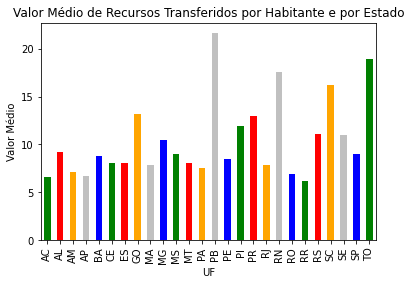

In [ ]:
#dados = dados.reindex()
fig , ax = plt.subplots()
# ibge["SITUACAO"].value_counts().plot.bar(color=["blue","green", "black"])
dados.groupby("SIGLA_UF")["ValorMedioHab"].mean().plot.bar(color=['green','red','orange','silver','blue'])
ax.set_ylabel("Valor Médio")
ax.set_xlabel("UF")
ax.set_title("Valor Médio de Recursos Transferidos por Habitante e por Estado")
# ax.set_ylim(0,12)
plt.show()

Apresentação dos dados gerais dos valores médios recebidos por habitante pelo Município

In [ ]:
# apresenta dados gerais dos valores médios recebidos por habitante pelo Município
dados.describe()

,TRANSFERIDO,SALDO_CONTA,PORCENT_EXECUTADO,COD_IBGE,POP_EST_2020,CAPITAL,IDHM,IDHM_RENDA,IDHM_EDUCACAO,IDHM_LONGEVIDADE,ValorMedioHab
count,4.636000e+03,4.229000e+03,3709.000000,4.636000e+03,4.636000e+03,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000
mean,2.534536e+05,6.633364e+04,0.841789,3.180142e+06,3.592425e+04,0.001294,0.658108,0.799952,0.559134,0.640936,11.366422
std,4.622348e+05,1.462840e+05,0.236699,9.183537e+05,8.331613e+04,0.035956,0.073184,0.046155,0.093657,0.082067,31.218536
min,2.845551e+04,1.000000e-02,0.003374,1.100023e+06,7.760000e+02,0.000000,0.418000,0.672000,0.207000,0.400000,0.034829
25%,6.336004e+04,4.076000e+02,0.752982,2.508678e+06,6.755500e+03,0.000000,0.595000,0.766000,0.488000,0.567000,7.548713
50%,1.259572e+05,2.240467e+04,0.978704,3.126554e+06,1.450650e+04,0.000000,0.662000,0.805000,0.558000,0.646500,8.388004
75%,2.417183e+05,7.262783e+04,0.999756,4.106630e+06,3.092675e+04,0.000000,0.719000,0.837000,0.632000,0.709000,9.681150
max,8.085843e+06,3.126408e+06,1.000000,5.221858e+06,1.499641e+06,1.000000,0.862000,0.894000,0.825000,0.891000,1716.076664


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


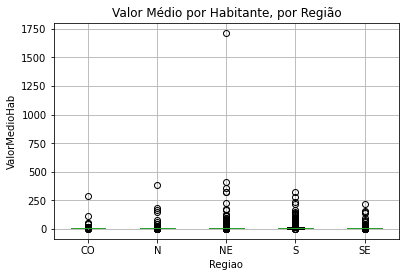

In [ ]:
# São considerados apenas os municípios que tiveram seu plano de ação aprovado e receberam transferêsncias de recursos

fig, ax = plt.subplots()
dados.boxplot(column="ValorMedioHab", by="REGIAO", ax=ax)
ax.set_xlabel("Regiao")
ax.set_ylabel("ValorMedioHab")
ax.set_title("Valor Médio por Habitante, por Região")
plt.suptitle("")
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


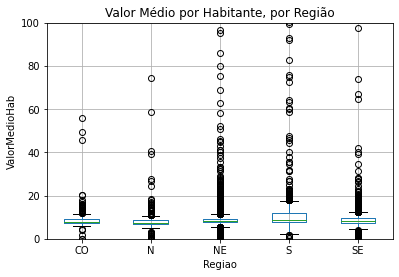

In [ ]:
fig, ax = plt.subplots()
dados.boxplot(column="ValorMedioHab", by="REGIAO", ax=ax)
ax.set_xlabel("Regiao")
ax.set_ylabel("ValorMedioHab")
ax.set_title("Valor Médio por Habitante, por Região")
ax.set_ylim(0,100)
plt.suptitle("")
plt.show()

Plotagem pelo Histograma

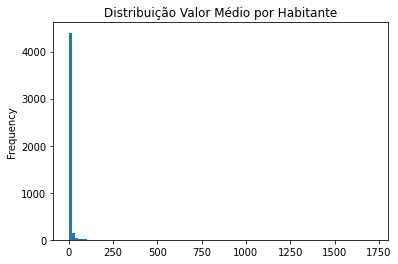

In [ ]:
# Plotagem do Histograma do valor médio transferido por habitante
dados['ValorMedioHab'].plot(kind='hist', bins=100)
plt.title("Distribuição Valor Médio por Habitante")
plt.show()

In [ ]:
# Apresentação da mediana dos valores médios transferidos por habitante
q5 = dados["ValorMedioHab"].quantile(.50)
q5

8.388004293038112

In [ ]:
# Apresentação do decil superior dos valores médios transferidos por habitante
q9 = dados["ValorMedioHab"].quantile(.90)
q9

13.255674890266215

Interpretação: ao se observar de modo amplo, não se percebe distorçoes do valor médio transferido por habitante aos Municípios, contudo, ao se categorizar cada vez mais os valores médios, começa-se a perceber uma quantidade razoável de outliers. Essa quantidade de outliers pode ser devido a uma base de dados não totalmente confiável, com erros, ou indícios de favorecimento do Ente Federado.

2 - Panorama dos Municípios Cadastrados e Não Cadastrados no Programa

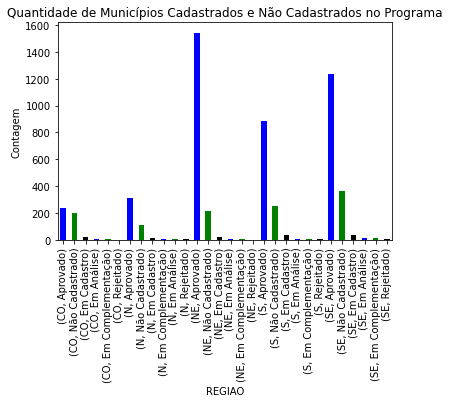

In [ ]:
fig , ax = plt.subplots()
# ibge["SITUACAO"].value_counts().plot.bar(color=["blue","green", "black"])
ibge.groupby("REGIAO")["SITUACAO"].value_counts().plot.bar(color=["blue","green", "black"])
ax.set_ylabel("Contagem")
ax.set_xlabel("REGIAO")
ax.set_title("Quantidade de Municípios Cadastrados e Não Cadastrados no Programa")
# ax.set_ylim(0,12)
plt.show()

Observa-se que a Região Nordeste apresenta a maior proporção entre os Municípios cadastrados no Programa, enquanto que a Região Centro-Oeste é a que apresenta a menor proporção.

3 - Correlação entre o IDHM e a participação no Programa do Auxílio Emergencial.

In [ ]:
# 
# Verificar o IDH médio em relação à participação ou não no Programa
# idh = pd.to_numeric('IDHM')
# ibge["IDH"] = pd.to_numeric(ibge["IDHM"])
#ibge["IDH"] = ibge["IDHM"].astype(float, errors = 'raise')

# ibge.groupby(['SITUACAO'])['IDH'].mean()

# sns.barplot(x="SITUACAO", y="IDHM") #, hue='Regiao', data=dados, dodge=False, order=['AC','AM','AP','PA','RO','RR', 'TO','AL','BA','CE','MA','PB','PE','PI','RN','SE','DF','GO','MS','MT','PR','RS','SC','ES','MG','RJ','SP' ])
# plt.title("Relação entre Participação no Programa e IDH")
# plt.show()

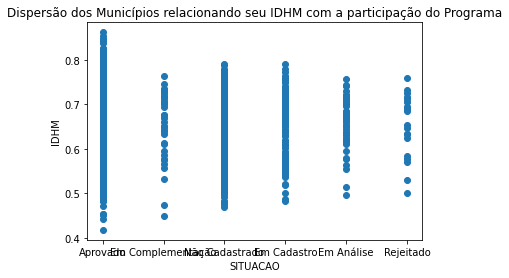

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


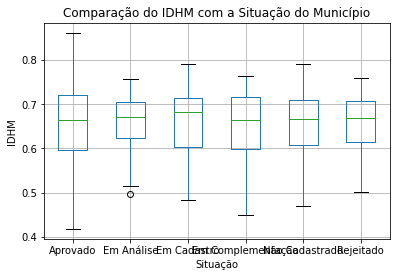

In [ ]:
fig, ax = plt.subplots()
ax.scatter(ibge["SITUACAO"],ibge["IDHM"])
ax.set_xlabel('SITUACAO')
ax.set_ylabel('IDHM')
ax.set_title('Dispersão dos Municípios relacionando seu IDHM com a participação do Programa')
plt.show()

fig, ax = plt.subplots()
ibge.boxplot(column="IDHM", by="SITUACAO", ax=ax)
ax.set_xlabel("Situação")
ax.set_ylabel("IDHM")
ax.set_title("Comparação do IDHM com a Situação do Município")
#ax.set_ylim(0,100)
plt.suptitle("")
plt.show()

Interpretação dos gráficos: O IDH do Município não influencia na sua participação no Programa do Auxílio Emergencial da Cultura.

In [ ]:
ibge['IDHM'].describe()

4 - Teste de Hipótese

In [ ]:
dados.corr()

Hipótese: verificar se existe relação de dependência entre o IDHM e o Valor Médio repassado por habitante.

In [ ]:
# cria função para realização dos testes de hipótese
def realiza_teste_quiquadrado(df, col1, col2, alpha=0.05):
  
  # obtem a tabela de contingência
  tabela_contingencia = pd.crosstab(dados[col1], dados[col2])
  
  # Realiza o teste qui-quadrado para verificar se existe relação de dependência entre os col1 and col2
  chi, p, dof, expected = stats.chi2_contingency(tabela_contingencia)

  # Verifica se o p_valor é menor que o nível de significância
  if p < alpha:
    print("As variáveis {} e {} são dependentes".format(col1, col2))
  else:
    print("As variáveis {} e {} não são dependentes".format(col1, col2))

  print()

  print("Valor de p encontrado")
  print(p)
  
  print("Tabela de Contingência:")
  print(tabela_contingencia)

In [ ]:
realiza_teste_quiquadrado(dados, 'IDHM', 'ValorMedioHab')

Interpretação dos dados obtidos - Correlação entre IDHM e Valor Médio repassado ao Município Não foi identificada correlação direta entre o IDHM e o Valor Médio repassado. A pergunta que a hipótese investigativa se propôs a responder é: "Municípios com maior IDHM se preocupam mais em manter suas estruturas culturais do que Municípios com menor IDHM? Por esse teste de hipótese a resposta é não. 

CONCLUSÕES

O objetivo desse trabalho foi sobretudo abordar os dados produzidos por uma política pública e apresentar uma visão macro dos resultados preliminares que essa política produziu.

Optou-se pelo uso de dados reais, os quais apresentam as mais diversas inconsistências, tais quais nomes inseridos de formas diferentes, CPFs no lugar de CNPJs, dentre outras. Fez-se previamente uma limpeza mínima nos dados, de forma a empregar os recursos de estatística e da linguagem Python para identificar essas inconsistências e subsidiariamente possíveis fraudes.